In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator #Data Augmentation
from tensorflow.keras.models import Sequential,Model #Model Olusturmak
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D #Katmanlari olusturmak
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers  import Concatenate
from tensorflow.keras.layers import AveragePooling2D, Dropout, Input, BatchNormalization
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.optimizers import SGD
from keras.preprocessing import image
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score
import urllib.request
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.layers import Input, Add, Dense,GlobalAvgPool2D, Concatenate, AvgPool2D, Dropout, ReLU, Activation, MaxPool2D, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, GlobalAveragePooling2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
import matplotlib.pyplot as plt
import os
import pandas as pd
import seaborn as sns
import numpy as np
import cv2
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop, Adam
from tensorflow.keras.applications import VGG16
from keras.applications import VGG19
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, BatchNormalization, Dropout
import tensorflow as tf

In [ ]:
train_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train/"
test_dir = "/content/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid/"

In [ ]:
class_names = os.listdir(train_dir)
batch_size=20

In [ ]:
traindata = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2,
                                   fill_mode='nearest')

testdata = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_generator=traindata.flow_from_directory(train_dir,
                                                             batch_size=batch_size,
                                                             class_mode="categorical",
                                                             target_size=(224,224),
                                                             color_mode="rgb",
                                                             shuffle=True )


test_data_generator=testdata.flow_from_directory(test_dir,
                                                           batch_size=batch_size,
                                                           class_mode="categorical",
                                                           target_size=(224,224),
                                                           color_mode="rgb",
                                                           shuffle=False )

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [ ]:
class_dict = train_data_generator.class_indices
class_list = list(class_dict.keys())
#class_list

In [ ]:
train_number=train_data_generator.samples
test_number=test_data_generator.samples

In [ ]:
mobilenetV2_model= tf.keras.applications.MobileNetV2(weights='imagenet',classes=38,include_top=False, input_shape=(224,224, 3))
x= mobilenetV2_model.output
x= GlobalAveragePooling2D()(x)
x= Dense(1024,activation='relu')(x)
x= Dense(512,activation='relu')(x)
x= BatchNormalization()(x)
x= Dropout(0.2)(x)
prediction= Dense(38, activation = 'softmax')(x)
model= Model(inputs= mobilenetV2_model.input, outputs= prediction)

model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N

In [ ]:
history= model.fit(train_data_generator,
                   validation_data= test_data_generator,
                   shuffle=True,
                   epochs =50,
                   batch_size=20)

Epoch 1/50
3515/3515 [==============================] - 1069s 295ms/step - loss: 0.4449 - accuracy: 0.8645 - val_loss: 4.6043 - val_accuracy: 0.4186
Epoch 2/50
3515/3515 [==============================] - 1002s 285ms/step - loss: 0.2201 - accuracy: 0.9306 - val_loss: 4.5333 - val_accuracy: 0.4377
Epoch 3/50
3515/3515 [==============================] - 1007s 287ms/step - loss: 0.1694 - accuracy: 0.9464 - val_loss: 1.2223 - val_accuracy: 0.7412
Epoch 4/50
3515/3515 [==============================] - 1001s 285ms/step - loss: 0.1346 - accuracy: 0.9570 - val_loss: 0.8844 - val_accuracy: 0.8380
Epoch 5/50
3515/3515 [==============================] - 998s 284ms/step - loss: 0.1093 - accuracy: 0.9656 - val_loss: 0.5250 - val_accuracy: 0.8860
Epoch 6/50
3515/3515 [==============================] - 1007s 287ms/step - loss: 0.0977 - accuracy: 0.9688 - val_loss: 1.0159 - val_accuracy: 0.8012
Epoch 7/50
3515/3515 [==============================] - 1013s 288ms/step - loss: 0.0849 - accuracy: 0.9724 

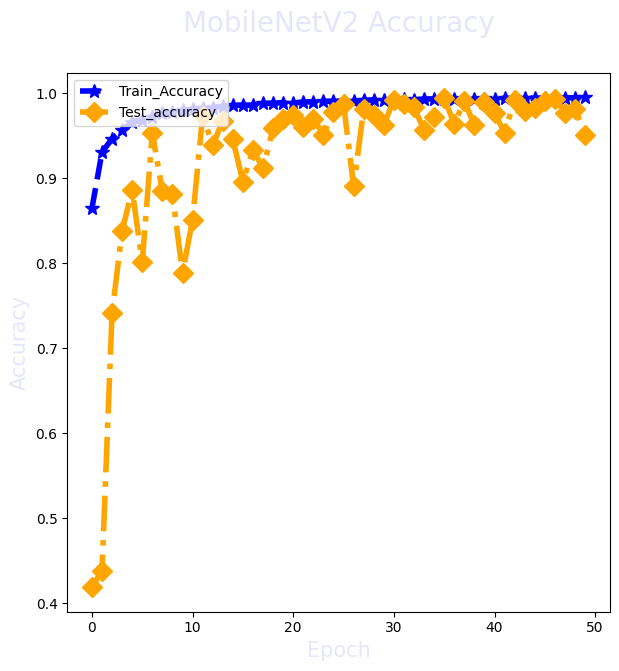

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(history.history['accuracy'],marker="*",linestyle="--",color="blue",markersize=10,lw=4)
plt.plot(history.history['val_accuracy'],marker="D",linestyle="-.",color="orange",markersize=10,lw=4)
plt.title('MobileNetV2 Accuracy\n',color="lavender",fontsize=20)
plt.ylabel('Accuracy',color="lavender",fontsize=15)
plt.xlabel('Epoch',color="lavender",fontsize=15)
plt.legend(['Train_Accuracy', 'Test_accuracy'], loc='upper left')
plt.show()

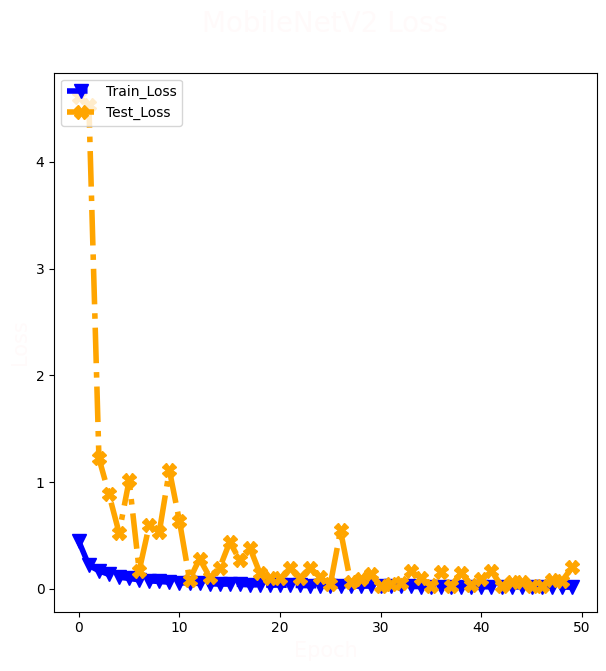

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(history.history['loss'],marker="v",linestyle="--",color="Blue",markersize=10,lw=4)
plt.plot(history.history['val_loss'],marker="X",linestyle="-.",color="Orange",markersize=10,lw=4)
plt.title('MobileNetV2 Loss\n',color="lavender",fontsize=20)
plt.ylabel('Loss',color="lavender",fontsize=15)
plt.xlabel('Epoch',color="lavender",fontsize=15)
plt.legend(['Train_Loss', 'Test_Loss'], loc='upper left')
plt.show()

In [ ]:
prediction=model.predict(test_data_generator,steps=test_number//batch_size + 1)
final_predict=np.argmax(prediction,axis=1)
true_data=test_data_generator.classes

879/879 [==============================] - 37s 41ms/step


In [ ]:
print("Accuracy Score is",accuracy_score(true_data,final_predict))

Accuracy Score is 0.9512861370361939


In [ ]:
print("ROC AUC Score is {}".format(roc_auc_score(true_data, prediction,multi_class='ovr')))

ROC AUC Score is 0.9996280303519115


In [ ]:
model.save('mobilnetv2_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


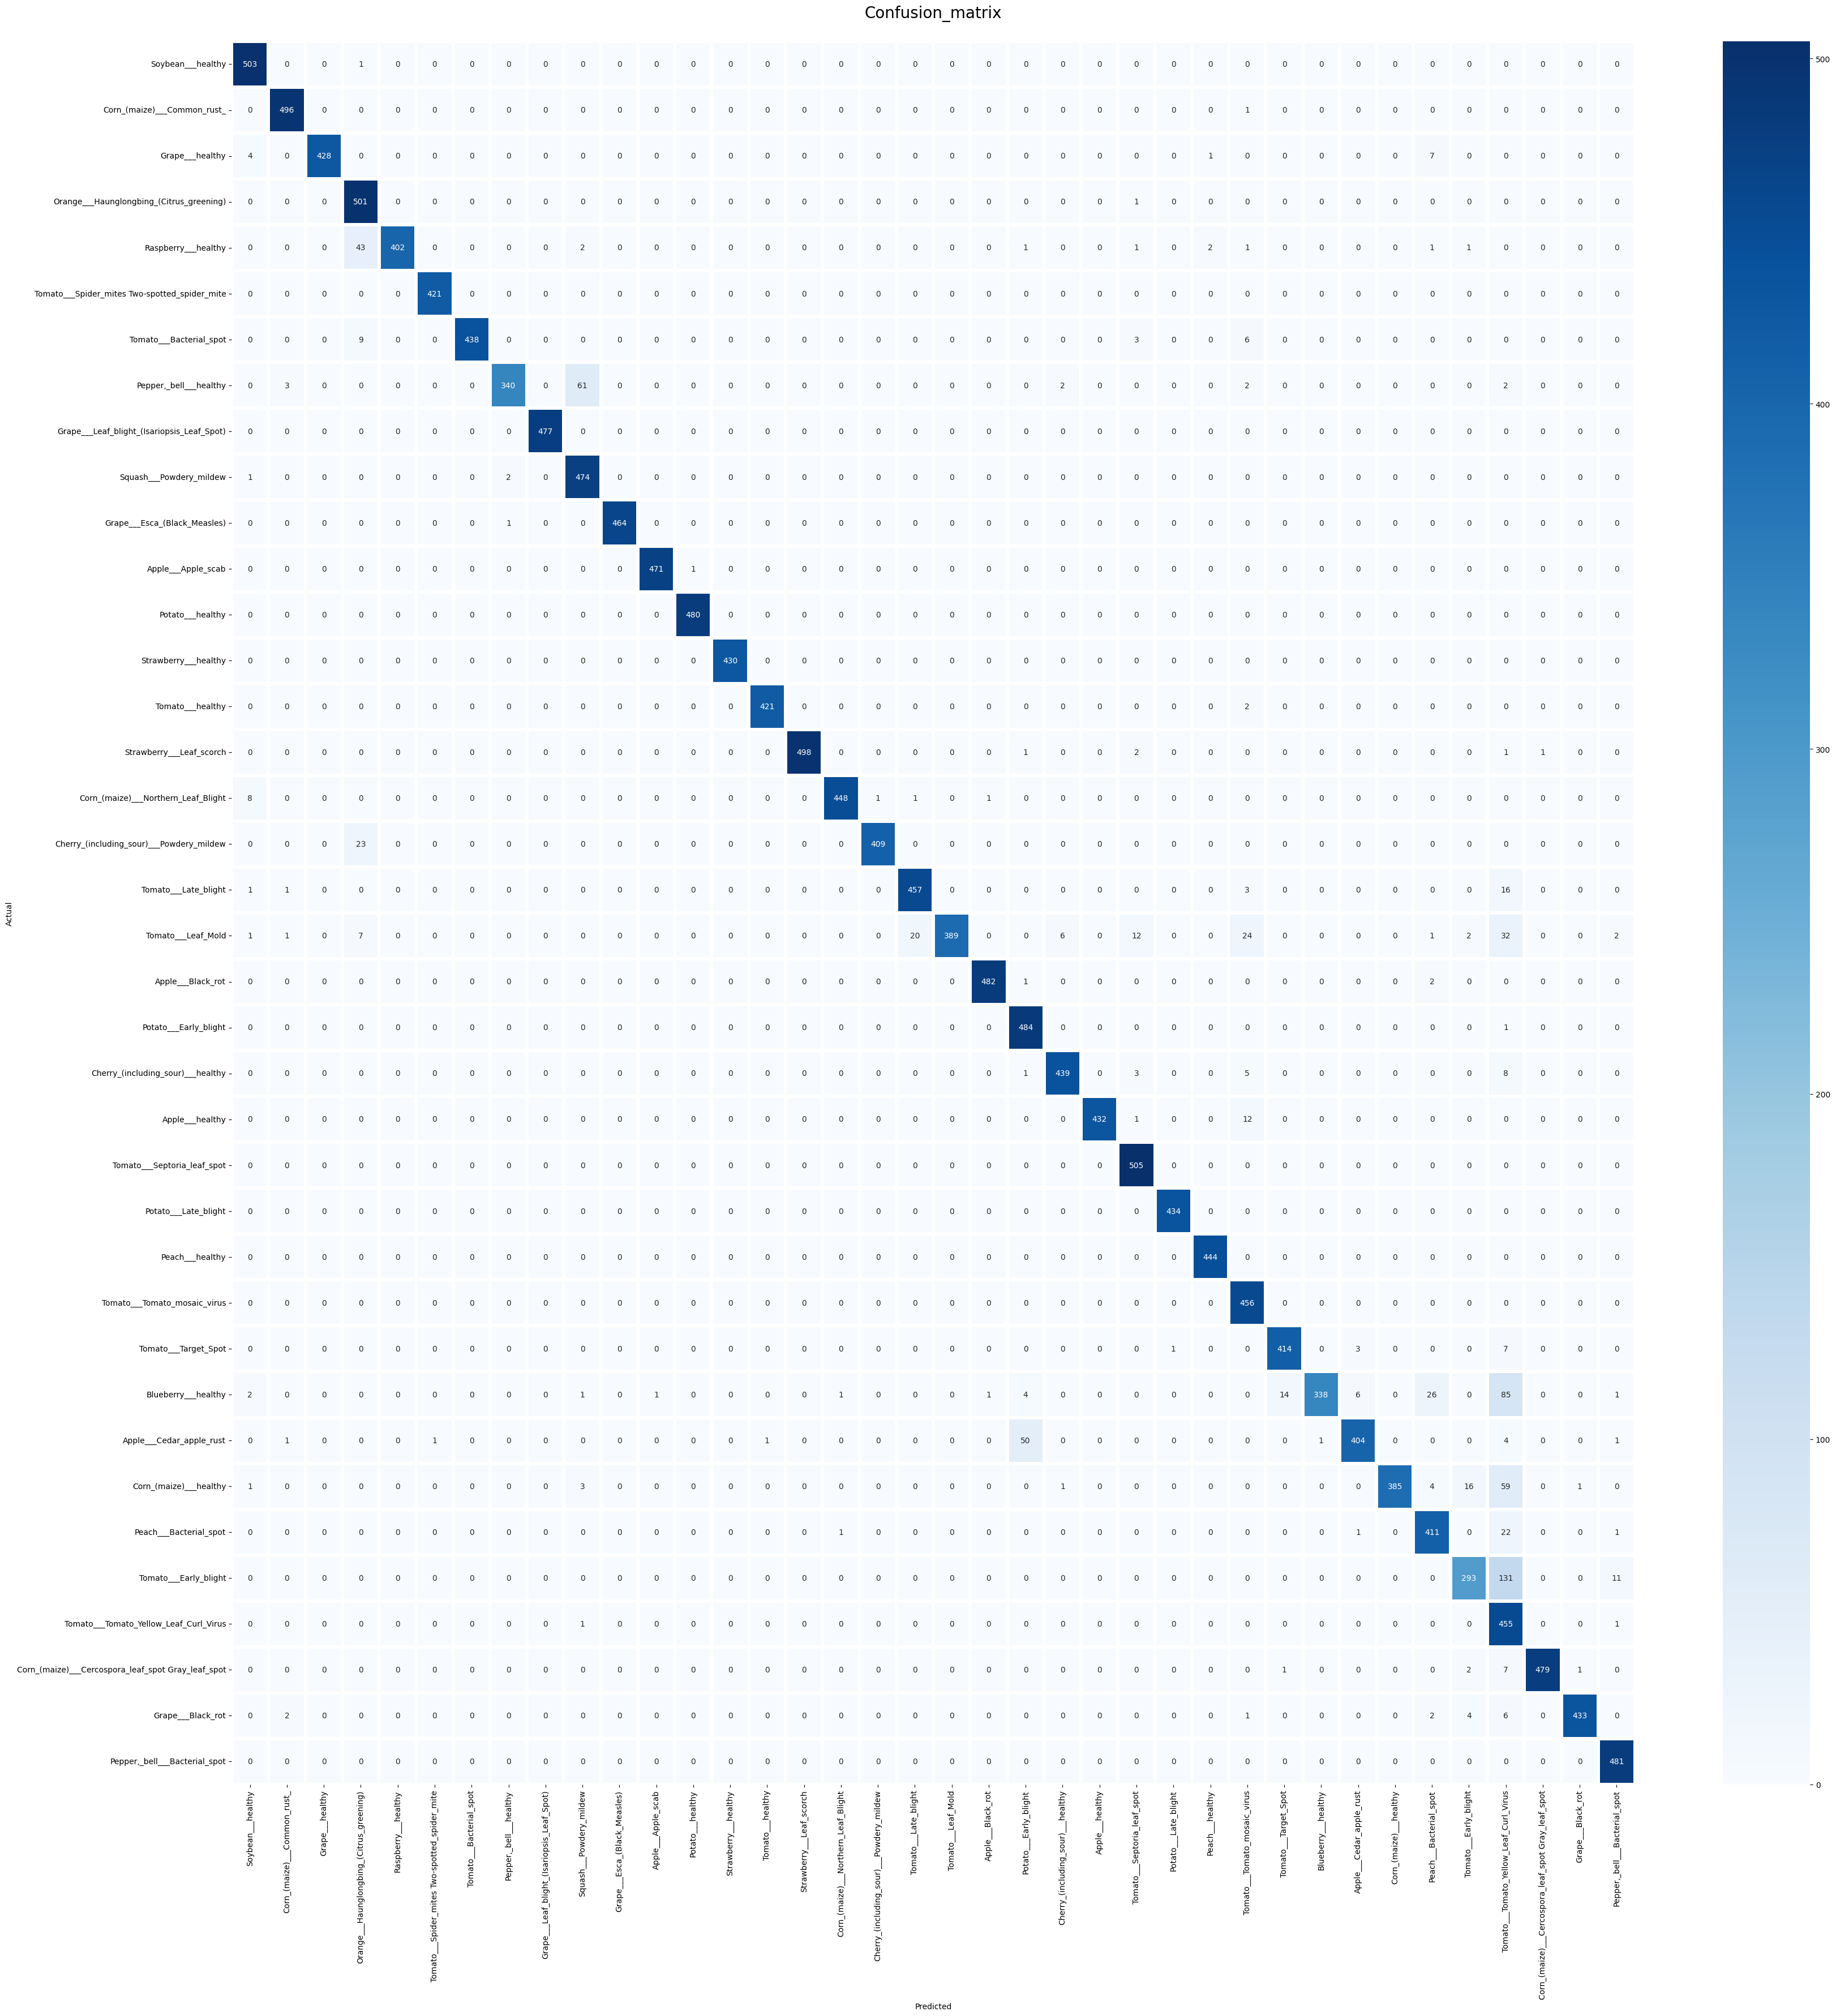

In [ ]:
plt.figure(figsize=(40,40))
cm= confusion_matrix(test_data_generator.classes,final_predict)
sns.heatmap(cm,  annot=True ,fmt="d",cmap="Blues",xticklabels=class_names,
            yticklabels=class_names,linewidth=4)
plt.title("Confusion_matrix\n",fontsize=20,color="black")
plt.ylabel('Actual')
plt.xlabel('Predicted')

plt.show()

In [ ]:
print(classification_report(test_data_generator.classes, final_predict,target_names=class_list))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      1.00      0.98       504
                                 Apple___Black_rot       0.98      1.00      0.99       497
                          Apple___Cedar_apple_rust       1.00      0.97      0.99       440
                                   Apple___healthy       0.86      1.00      0.92       502
                               Blueberry___healthy       1.00      0.89      0.94       454
          Cherry_(including_sour)___Powdery_mildew       1.00      1.00      1.00       421
                 Cherry_(including_sour)___healthy       1.00      0.96      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.99      0.83      0.90       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.87      0.99      0.

In [ ]:
import random

class_name = list(test_data_generator.class_indices.keys())

image_indices = list(range(len(test_data_generator.filepaths)))
random.shuffle(image_indices)

plt.figure(figsize=(30, 30))
number_images = (5, 5)

for i in range(1, (number_images[0] * number_images[1]) + 1):
    plt.subplot(number_images[0], number_images[1], i)
    plt.axis("off")

    shuffled_index = image_indices[i - 1]

    true_label = class_name[test_data_generator.classes[shuffled_index]]
    predicted_label = class_name[final_predict[shuffled_index]]

    color = "green"
    if true_label != predicted_label:
        color = "red"

    plt.title(f"True: {true_label}\nPredicted: {predicted_label}", color=color)
    plt.imshow(plt.imread(test_data_generator.filepaths[shuffled_index]))

plt.show()

Output hidden; open in https://colab.research.google.com to view.